## Approximation 
$\hat{y} = wx + b$, this is the linear function we want to approximate a set of data $\{ x_i, y_i\}, i \in [1, n]$

## Cost Function 
MSE = $J(w, b) = \frac{1}{N} \sum_{i=1}^n (y_i - (wx_i + b)) ^ 2$

We want to find the right weight $w$ and bias $b$ to minimun the cost fuction, one way to do so is **Gradient Descent**. 

$$\frac{\partial J(w, b)}{\partial w} = - \frac{2}{N} \sum_{i=1}^n (y_i - (w x_i + b)) x_i$$
$$\frac{\partial J(w, b)}{\partial b} = - \frac{2}{N} \sum_{i=1}^n (y_i - (w x_i + b))$$

## Gradient Descent
### Update rules 

$w = w - \alpha \dot \nabla_w J(w, b)$

$b = b - \alpha \dot \nabla_b J(w, b)$, where $\alpha$ is learning rate, and 

$\nabla_w J(w, b) = - \frac{2}{N} \sum_{i=1}^n (y_i - (w x_i + b)) x_i = \frac{2}{N} \sum_{i=1}^n (\hat{y}_i - y_i) x_i$

$\nabla_b J(w, b) = - \frac{2}{N} \sum_{i=1}^n (y_i - (w x_i + b)) = \frac{2}{N} \sum_{i=1}^n (\hat{y}_i - y_i)$

In [17]:
import numpy as np 

class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr 
        self.n_iters = n_iters
        self.weights = None 
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0 
        
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            partial_w = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            partial_b = (1 / n_samples) * np.sum(y_pred - y)
            
            self.weights -= self.lr * partial_w
            self.bias -= self.lr * partial_b 
    
    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred 


CPU times: user 17.9 s, sys: 4.57 s, total: 22.5 s
Wall time: 11.4 s
MSE,  398.32239247654155


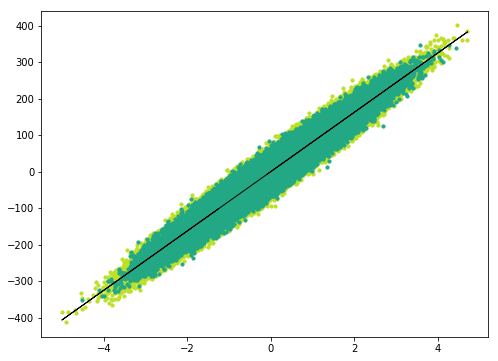

In [21]:
# Do experiments
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse 

X, y = datasets.make_regression(n_samples=1000_000, n_features=1, noise=20, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1233)

fig = plt.figure(figsize=(8, 6))
# plt.scatter(X[:, 0], y, color='b', marker='o', s=30)

lr = LinearRegression(lr=0.1)
%time lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
print("MSE, ", mse(y_val, y_pred))

y_pred_line = lr.predict(X)
cmap = plt.get_cmap('viridis')
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_val, y_val, color=cmap(0.6), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=1)


